# Fit a Polynomial

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

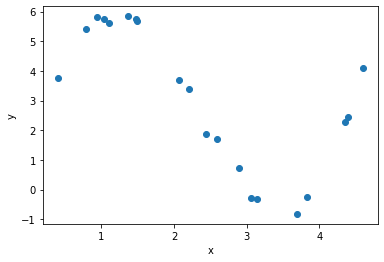

In [2]:
url = 'https://raw.githubusercontent.com/BolunDai0216/nyuMLSummerSchool/master/day03/polyfit_data.csv'
df = pd.read_csv(url)
x = df['x'].values
y = df['y'].values
plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Exercice :
1) Compute the Design matrix :
$ \begin{bmatrix} 1 & x_{1} & x_{1}^2 & \cdots & x_{1}^M \\ 1 & x_{2} &
    x_{2}^2 & \cdots & x_{2}^M \\ \vdots & & \ddots & & \vdots \\ 1 & x_{N} & x_{N}^2 & \cdots & x_{N}^M \end{bmatrix}$

2) Compute the Least-Square solution : $\mathbf{w} = (X^TX)^{-1}X^TY$

3) Compute the MSE

4) Make a prediction for xplt = np.linspace(0, 5, 100) and plot your polynomial over the data points

5) Try to find the "best" value for M

Polynomial degree = 3     mse = 0.0317958519811255


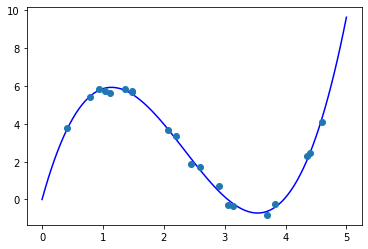

In [3]:
# Choose any integer value for M
M = 3


def design_matrix(x, M):
    x = x.reshape(-1,1)
    bias_col = np.ones((x.shape[0], 1))
    PhiX = bias_col
    for i in np.arange(1, M+1):
        PhiX = np.hstack([PhiX, x**i])
    return PhiX

X = design_matrix(x, M)
y = y.reshape(-1, 1)

# w = np.linalg.inv(X.T @ X) @ X.T @ y
w = np.linalg.pinv(X) @ y

yhat = X @ w

mse = np.mean((y-yhat)**2)
print('Polynomial degree = {}    '.format(M), 'mse = {}'.format(mse))

xplt = np.linspace(0, 5, 100)
Xplt = design_matrix(xplt, M)

yplt = Xplt @ w
plt.plot(xplt, yplt,'b')
plt.plot(x,y,'o')

# Bonus :

Reproduce your code with sklearn !

Polynomial degree = 3     mse = 0.031795851981125056


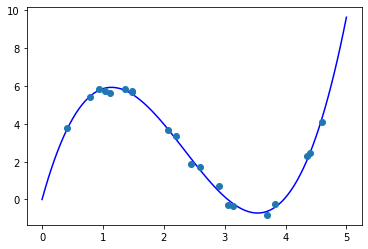

In [4]:
from sklearn import linear_model

X = design_matrix(x, M)
# fitting the model
reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit(X, y)
w = reg.coef_

# training error
yhat = reg.predict(X)
mse = np.mean((y-yhat)**2)
print('Polynomial degree = {}    '.format(M), 'mse = {}'.format(mse))
yplt = reg.predict(design_matrix(xplt, M))
plt.plot(xplt, yplt,'b')
plt.plot(x, y,'o')

# Searching for the best M

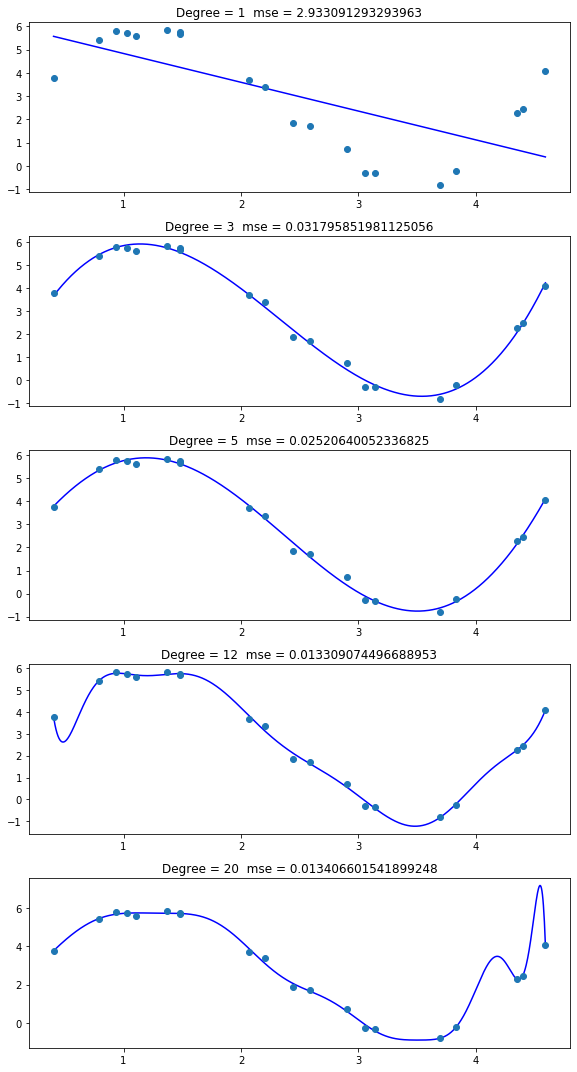

In [5]:
degrees = [1, 3, 5, 12, 20]

fig, ax = plt.subplots(5, 1, figsize=(8,15))
xplt = np.linspace(x.min(), x.max(), 1000)
for i in range(5):
    M = degrees[i]
    X = design_matrix(x, M)
    reg = linear_model.LinearRegression(fit_intercept=False)
    yhat = reg.fit(X, y)
    yhat = reg.predict(X)
    mse = np.mean((y-yhat)**2)
    yplt = reg.predict(design_matrix(xplt, M))
    ax[i].plot(xplt, yplt,'b')
    ax[i].plot(x, y,'o')
    ax[i].set_title(f'Degree = {M}  mse = {mse}')
plt.tight_layout()

# Train/Test

In [6]:
x = df['x'].values
y = df['y'].values
nsamp = x.shape[0]
print(f'We have {nsamp} samples')

We have 20 samples


In [7]:
inds = np.random.permutation(nsamp)
ntrain = 12
ntest = 8
train_index = inds[:ntrain]
test_index = inds[ntrain:]

xtrain, ytrain = x[train_index], y[train_index]
xtest, ytest = x[test_index], y[test_index]

print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(12,)
(12,)
(8,)
(8,)


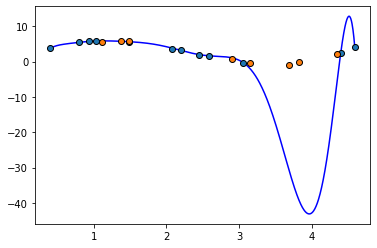

In [8]:
M = 10

Xtrain = design_matrix(xtrain, M)
# fitting the model
reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit(Xtrain, ytrain)


yplt = reg.predict(design_matrix(xplt, M))
plt.plot(xplt, yplt,'b')
plt.plot(xtrain,ytrain,'o',markeredgecolor='black')
plt.plot(xtest,ytest,'o',markeredgecolor='black')